<a href="https://colab.research.google.com/github/SethupathyM/Unsupervised_ML_Clustering_and_Sentiment_Analysis_Zomato_Restaurant/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from nltk.stem import PorterStemmer, LancasterStemmer

from yellowbrick.cluster import KElbowVisualizer
from wordcloud import WordCloud

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [3]:
# Reading the CSV file
df = pd.read_csv('/content/Mydrive/MyDrive/Capstone_Project_Unsupervised_ML_Zomato_Restaurant_Clustering_and_Sentiment_Analysis/Zomato Restaurant names and Metadata.csv')

In [4]:
# Shape
df.shape

(105, 6)

In [5]:
# Head
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [7]:
# Null values
# Percentage of null values for each features
# print(list(df.columns))

for col in list(df.columns):
  if ((df[col].isnull().sum())/(len(df[col]))*100) > 50:
    # print((df[col].isnull().sum())/(len(df[col]))*100)
    print(col)

# As in the feature 'Collections' more than 50% of the observations are NULL values, so feature 'Collections' is droppped

Collections


In [8]:
# Dropping the 'Collections' feature
df.drop(columns = 'Collections',axis =1,inplace = True)

# Removing the observations with null values in 'Timings' feature
df.dropna(axis = 0,inplace = True)

# Print
print(df.shape)
print(df.info())

(104, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      104 non-null    object
 1   Links     104 non-null    object
 2   Cost      104 non-null    object
 3   Cuisines  104 non-null    object
 4   Timings   104 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB
None


In [9]:
# Summary
df.describe()

,Name,Links,Cost,Cuisines,Timings
count,104,104,104,104,104
unique,104,104,29,91,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,6


In [10]:
# Tokenizer
tokenizer = Tokenizer(num_words="MAX_NB_WORDS")
tokenizer.fit_on_texts(df[['Cuisines','Links','Timings']])

In [11]:
# Functions
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    return words

col_lsts = ['Links','Cuisines','Timings']
for col_lst in col_lsts:
  df[col_lst] = normalize(df[col_lst])

In [12]:
df.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese continental kebab european south india...,12noon to 330pm 630pm to 1130pm monsun
1,Paradise,httpswwwzomatocomhyderabadparadisegachibowli,800,biryani north indian chinese,11 am to 11 pm
2,Flechazo,httpswwwzomatocomhyderabadflechazogachibowli,"1,300",asian mediterranean north indian desserts,1130 am to 430 pm 630 pm to 11 pm
3,Shah Ghouse Hotel & Restaurant,httpswwwzomatocomhyderabadshahghousehotelresta...,800,biryani north indian chinese seafood beverages,12 noon to 2 am
4,Over The Moon Brew Company,httpswwwzomatocomhyderabadoverthemoonbrewcompa...,"1,200",asian continental north indian chinese mediter...,12noon to 11pm mon tue wed thu sun 12noon to 1...


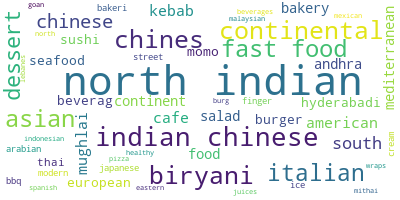

In [13]:
# Visualization of words from 'Cuisines' feature
df['Cuisines']= df['Cuisines'].astype(str)

ps = PorterStemmer() 
df['Cuisines']=df['Cuisines'].map(lambda x: ps.stem(x))
long_string = ','.join(list(df['Cuisines'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [14]:
pd.DataFrame(df.Cuisines.unique())

,0
0,chinese continental kebab european south india...
1,biryani north indian chines
2,asian mediterranean north indian dessert
3,biryani north indian chinese seafood beverag
4,asian continental north indian chinese mediter...
...,...
86,asian sushi
87,chinese seafood
88,fast food salad
89,bakery mithai


In [15]:
# Tfidf vectorizer
vectorizer = TfidfVectorizer(stop_words= 'english')

X = vectorizer.fit_transform(df['Cuisines'])

In [16]:
X.shape
# we have 47 unique words

(104, 53)

In [17]:
# Type of X object
type(X)

scipy.sparse.csr.csr_matrix

In [18]:
# Converting 'X' object to array
X = X.toarray()

In [19]:
type(X)

numpy.ndarray

In [20]:
# Elbow method to find appropriate 'K' value

In [21]:
# 'k-means++' would initialize the centroids far from each other because intialize the centroids nearby could lead to improper clustering

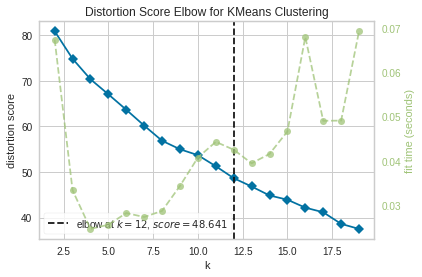

In [22]:
# KElbowvisualizer with metric as 'distortion

model = KMeans(init="k-means++",max_iter=300,random_state=0)
visualizer = KElbowVisualizer(model, k=(2,20),metric= 'distortion', timings= True, locate_elbow= True)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()

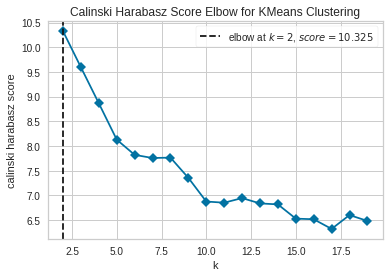

In [23]:
# KElbowvisualizer with metric as 'calinski_harabasz'

model = KMeans(init="k-means++",max_iter=300,random_state=0)
visualizer = KElbowVisualizer(model, k=(2,20),metric= 'calinski_harabasz', timings= False, locate_elbow= True)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()

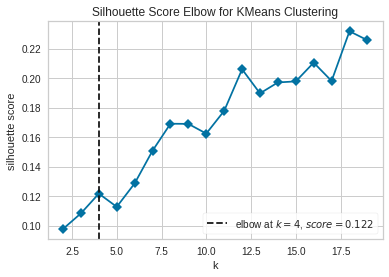

In [24]:
# # KElbowvisualizer with metric as 'silhouette'
model = KMeans(init="k-means++",max_iter=300,random_state=0)
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False, locate_elbow=True)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()

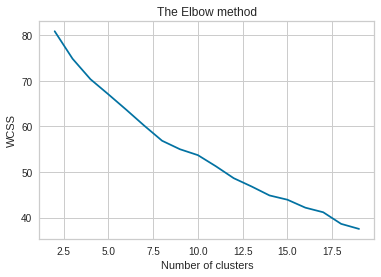

In [25]:
# Eblow method
wcss = []
for i in range(2,20):
  kmeans = KMeans(n_clusters =i,init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(2,20),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
# looks like we can go with k clusters.

kmeans= KMeans(n_clusters=26, init= 'k-means++',max_iter=300, n_init=1,random_state = 0)

kmeans.fit(X)

KMeans(n_clusters=26, n_init=1, random_state=0)

In [41]:
#predict the labels of clusters.
labels = kmeans.fit_predict(X)

In [42]:
# Clusters center
clusters_center = kmeans.cluster_centers_

In [43]:
# clusters_center

In [44]:
# test a new text

X_new= vectorizer.transform([df['Cuisines'][26]])

y_pred_new= kmeans.predict(X_new)[0]

y_pred_new

18

In [45]:
# Silhouette score is for model validation for K-means,Hierarichical clustering.
# Silhouette Coefficient ranges between -1 to +1.
# Higher the Silhouette Coefficient better the clustering.

In [46]:
# Model Validation
# silhouette score of my clusters
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient: 0.255


In [47]:
# Evaluation
# range_n_clusters = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
range_n_clusters = [ 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", round(silhouette_avg,5))

For n_clusters = 6 The average silhouette_score is : 0.13948
For n_clusters = 7 The average silhouette_score is : 0.15039
For n_clusters = 8 The average silhouette_score is : 0.15391
For n_clusters = 9 The average silhouette_score is : 0.17174
For n_clusters = 10 The average silhouette_score is : 0.16449
For n_clusters = 11 The average silhouette_score is : 0.18174
For n_clusters = 12 The average silhouette_score is : 0.18695
For n_clusters = 13 The average silhouette_score is : 0.19525
For n_clusters = 14 The average silhouette_score is : 0.20674
For n_clusters = 15 The average silhouette_score is : 0.21189
For n_clusters = 16 The average silhouette_score is : 0.21679
For n_clusters = 17 The average silhouette_score is : 0.21303
For n_clusters = 18 The average silhouette_score is : 0.23117
For n_clusters = 19 The average silhouette_score is : 0.24122
For n_clusters = 20 The average silhouette_score is : 0.251
For n_clusters = 21 The average silhouette_score is : 0.22685
For n_clusters

In [48]:
# Creating new feature to store labels
df['Cluster_labels'] = kmeans.labels_

In [49]:
df.head()

,Name,Links,Cost,Cuisines,Timings,Cluster_labels
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese continental kebab european south india...,12noon to 330pm 630pm to 1130pm monsun,19
1,Paradise,httpswwwzomatocomhyderabadparadisegachibowli,800,biryani north indian chines,11 am to 11 pm,3
2,Flechazo,httpswwwzomatocomhyderabadflechazogachibowli,"1,300",asian mediterranean north indian dessert,1130 am to 430 pm 630 pm to 11 pm,21
3,Shah Ghouse Hotel & Restaurant,httpswwwzomatocomhyderabadshahghousehotelresta...,800,biryani north indian chinese seafood beverag,12 noon to 2 am,11
4,Over The Moon Brew Company,httpswwwzomatocomhyderabadoverthemoonbrewcompa...,"1,200",asian continental north indian chinese mediter...,12noon to 11pm mon tue wed thu sun 12noon to 1...,1


In [50]:
# Counting the number of cuisines with each labels
pd.DataFrame(df.groupby(['Cluster_labels'])['Cuisines'].count()).reset_index()

,Cluster_labels,Cuisines
0,0,5
1,1,11
2,2,13
3,3,8
4,4,5
5,5,4
6,6,2
7,7,3
8,8,2
9,9,8


In [51]:
# Getting terms
terms = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
len(terms)

53

In [55]:
# Top terms(words) per cluster
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(26):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: andhra
 biryani
 indian
 north
 chines
 chinese
 hyderabadi
 south
 food
 goan
Cluster 1: continental
 italian
 asian
 indian
 north
 chinese
 modern
 spanish
 goan
 kebab
Cluster 2: fast
 food
 salad
 lebanes
 north
 indian
 pizza
 burger
 beverag
 burg
Cluster 3: chines
 north
 indian
 biryani
 dessert
 mughlai
 bakeri
 mediterranean
 andhra
 seafood
Cluster 4: continent
 north
 indian
 chinese
 healthy
 lebanes
 continental
 food
 goan
 thai
Cluster 5: american
 burger
 kebab
 chines
 continental
 north
 indian
 fast
 european
 eastern
Cluster 6: ice
 cream
 dessert
 wraps
 chines
 finger
 fast
 european
 eastern
 desserts
Cluster 7: north
 indian
 chinese
 continent
 mediterranean
 beverag
 andhra
 seafood
 salad
 european
Cluster 8: hyderabadi
 mughlai
 chinese
 north
 indian
 wraps
 cafe
 european
 eastern
 desserts
Cluster 9: asian
 momo
 thai
 chinese
 sushi
 eastern
 malaysian
 indonesian
 north
 chines
Cluster 10: cafe
 dessert
 continental
 